In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [5]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [6]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df['battery_power'] = sc.fit_transform(df[['battery_power']])
df['clock_speed'] = sc.fit_transform(df[['clock_speed']])
df['int_memory'] = sc.fit_transform(df[['int_memory']])
df['mobile_wt'] = sc.fit_transform(df[['mobile_wt']])
df['px_height'] = sc.fit_transform(df[['px_height']])
df['px_width'] = sc.fit_transform(df[['px_width']])
df['ram'] = sc.fit_transform(df[['ram']])

In [8]:
data = df.drop('price_range',axis=1)
label = df.price_range

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=42)

In [10]:
X_train.shape

(1500, 20)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 5ms/step - loss: 4.7107 - accuracy: 0.2460
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 2.6409 - accuracy: 0.2613
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 2.0487 - accuracy: 0.2580
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.8531 - accuracy: 0.2700
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 1.7286 - accuracy: 0.2747
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.6419 - accuracy: 0.2713
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5787 - accuracy: 0.2700
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 1.5305 - accuracy: 0.2720
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4922 - accuracy: 0.2827
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4606 - accuracy: 0.2847
Epoch 11/

In [15]:
# 83.4% accuracy obtained

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


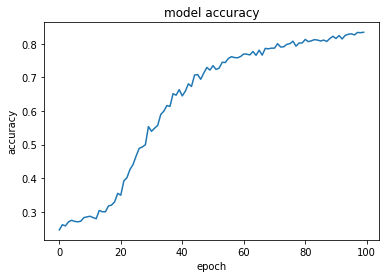

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()


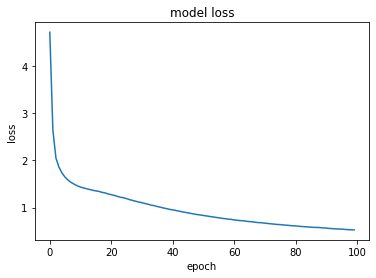

In [18]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()